In [1]:
from IPython.display import display, HTML

In [2]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    ChEMBL Database Query
</div>
<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a1/Chembl_logo.png" width="400" style="margin-top: 20px;">
</center>
"""

# Display the banner
display(HTML(banner_html))

ChEMBL 34, released on 28/03/2024, includes a full update to drug and clinical candidate data. This version contains 2,431,025 compounds (with 2,409,270 having associated mol files), 3,106,257 compound records, 20,772,701 activity data points, 1,644,390 assays, 15,598 targets, and 89,892 documents.

In [3]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Import Libraries
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [21]:
! pip install chembl_webresource_client

In [23]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from chembl_webresource_client.new_client import new_client

In [6]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Search for Target Protein
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

In [24]:
search_term ="RIPK1" # Term you wish to search
target = new_client.target
target_query = target.search(search_term)
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Rattus norvegicus,Receptor (TNFRSF)-interacting serine-threonine...,16.0,False,CHEMBL4523112,"[{'accession': 'D3ZYL0', 'component_descriptio...",SINGLE PROTEIN,10116
1,[],Mus musculus,Receptor-interacting serine/threonine-protein ...,13.0,False,CHEMBL3784911,"[{'accession': 'Q60855', 'component_descriptio...",SINGLE PROTEIN,10090
2,[],Homo sapiens,Receptor-interacting serine/threonine-protein ...,12.0,False,CHEMBL5464,"[{'accession': 'Q13546', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Cereblon/Receptor-interacting serine/threonine...,12.0,False,CHEMBL5465217,"[{'accession': 'Q13546', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,[],Homo sapiens,Mitogen-activated protein kinase 10/Receptor-i...,8.0,False,CHEMBL3885602,"[{'accession': 'P53779', 'component_descriptio...",PROTEIN FAMILY,9606


**Select and retrieve bioactivity data for desired protein**

We will assign the index from above table

In [25]:
index_of_target = 2 # Index from table
selected_target = targets.target_chembl_id[index_of_target]
selected_target

'CHEMBL5464'

In [9]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Filtering of Target Protein by IC50 Values
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

Here, we will retrieve only bioactivity data that are reported as IC$_{50}$ values in nM (nanomolar) unit.

In [26]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [27]:
df = pd.DataFrame.from_dict(res)

In [28]:
df.head(10)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13890064,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.2
1,None,None,13890065,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,7.9
2,None,None,13890066,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.79
3,None,None,13890067,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,7.9
4,None,None,13890068,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.25
5,None,None,13890069,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,10.0
6,None,None,13890070,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,1.3
7,None,None,13890071,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,10.0
8,None,None,13890072,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.25
9,None,None,13890073,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,5.0


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [29]:
df.to_csv('bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [30]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,13890064,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.2
1,None,None,13890065,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,7.9
2,None,None,13890066,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.79
3,None,None,13890067,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,7.9
4,None,None,13890068,[],CHEMBL3110728,Inhibition of RIP1 in human U937 cells assesse...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25710194,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5388027,Inhibition of RIPK1 (unknown origin) using MBP...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.12
626,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25710195,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5388027,Inhibition of RIPK1 (unknown origin) using MBP...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.1
627,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25710196,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5388027,Inhibition of RIPK1 (unknown origin) using MBP...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.088
628,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25710197,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5388027,Inhibition of RIPK1 (unknown origin) using MBP...,B,None,None,BAO_0000190,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,IC50,uM,UO_0000065,None,0.1


In [13]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Labeling bioactivity based on IC50
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))


The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [31]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")


### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [32]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL3109221,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3coc4ncnc(N)c34)cc...,200.0
1,CHEMBL396107,Nc1ncnc2occ(-c3ccc(NC(=O)Nc4cc(C(F)(F)F)cc(C(F...,7900.0
2,CHEMBL436806,Nc1ncnc2occ(-c3ccc(NC(=O)Nc4ccc5ccccc5c4)cc3)c12,790.0
3,CHEMBL3109220,Nc1ncnc2occ(-c3ccc(NC(=O)Nc4cccc(Cl)c4)cc3)c12,7900.0
4,CHEMBL3109219,CCc1cccc(NC(=O)Nc2ccc(-c3coc4ncnc(N)c34)cc2)c1,250.0
...,...,...,...
625,CHEMBL5434486,O=C(c1ccc(-c2cc3cccnc3[nH]2)cc1)N1CCCCC1,120.0
626,CHEMBL5404074,O=C(c1ccc(-c2cc3cccnc3[nH]2)cc1)N1CCNCC1,100.0
627,CHEMBL5427291,O=C(c1ccc(-c2cc3cccnc3[nH]2)cc1)N1CCOCC1,88.0
628,CHEMBL5434132,CN1CCN(C(=O)c2ccc(-c3cc4cccnc4[nH]3)cc2)CC1,100.0


In [33]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity').reset_index(drop=True)
df4 = pd.concat([df3.reset_index(drop=True), bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity
0,CHEMBL3109221,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3coc4ncnc(N)c34)cc...,200.0,active
1,CHEMBL396107,Nc1ncnc2occ(-c3ccc(NC(=O)Nc4cc(C(F)(F)F)cc(C(F...,7900.0,intermediate
2,CHEMBL436806,Nc1ncnc2occ(-c3ccc(NC(=O)Nc4ccc5ccccc5c4)cc3)c12,790.0,active
3,CHEMBL3109220,Nc1ncnc2occ(-c3ccc(NC(=O)Nc4cccc(Cl)c4)cc3)c12,7900.0,intermediate
4,CHEMBL3109219,CCc1cccc(NC(=O)Nc2ccc(-c3coc4ncnc(N)c34)cc2)c1,250.0,active
...,...,...,...,...
616,CHEMBL5434486,O=C(c1ccc(-c2cc3cccnc3[nH]2)cc1)N1CCCCC1,120.0,active
617,CHEMBL5404074,O=C(c1ccc(-c2cc3cccnc3[nH]2)cc1)N1CCNCC1,100.0,active
618,CHEMBL5427291,O=C(c1ccc(-c2cc3cccnc3[nH]2)cc1)N1CCOCC1,88.0,active
619,CHEMBL5434132,CN1CCN(C(=O)c2ccc(-c3cc4cccnc4[nH]3)cc2)CC1,100.0,active


In [34]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Exporting CSV file of IC50 dataset
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

In [51]:
df4.to_csv('IC50_bioactivity_data_preprocessed.csv', index=False)

In [36]:
from google.colab import files
files.download('IC50_bioactivity_data_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

In [37]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Exploratory Data Analysis
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

Total number of molecules: 621
Unique number of molecules: 305


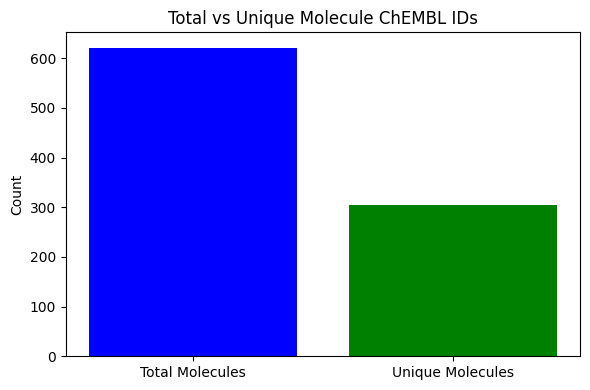

In [63]:
 # Calculate total and unique molecule_chembl_id counts
total_molecules = df4['molecule_chembl_id'].count()
unique_molecules = df4['molecule_chembl_id'].nunique()
print(f"Total number of molecules: {total_molecules}")
print(f"Unique number of molecules: {unique_molecules}")

# Create a bar plot for total vs unique molecule_chembl_id counts
plt.figure(figsize=(6, 4))
plt.bar(['Total Molecules', 'Unique Molecules'], [total_molecules, unique_molecules], color=['blue', 'green'])
plt.title('Total vs Unique Molecule ChEMBL IDs')
plt.ylabel('Count')
plt.tight_layout()

# Show the figure
plt.show()

bioactivity
active          502
inactive         62
intermediate     57
Name: count, dtype: int64


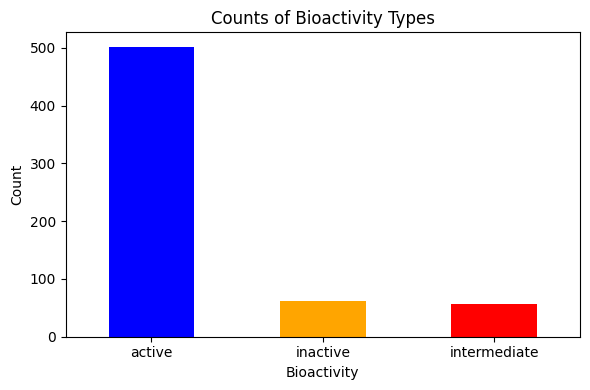

In [64]:
# Calculate the counts of each bioactivity type
bioactivity_counts = df4['bioactivity'].value_counts()
print(bioactivity_counts)

# Create a bar plot for bioactivity counts
plt.figure(figsize=(6, 4))
bioactivity_counts.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Counts of Bioactivity Types')
plt.xlabel('Bioactivity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()


# Show the figure
plt.show()

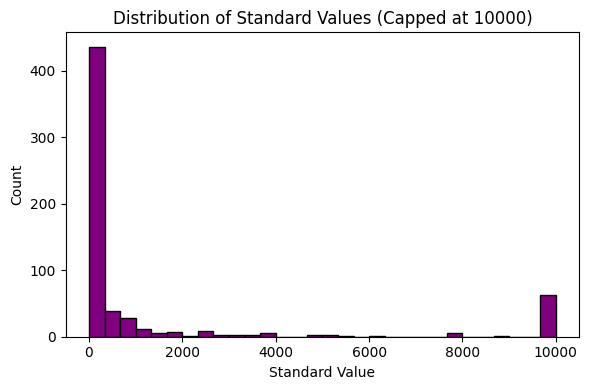

In [85]:
# Convert 'standard_value' to numeric, coercing errors to NaN (if any non-numeric values are present)
df4['standard_value'] = pd.to_numeric(df4['standard_value'], errors='coerce')

# Cap the standard_value at 10000 for the histogram
capped_standard_values = np.where(df4['standard_value'] > 10000, 10000, df4['standard_value'])

# Create a histogram for the capped standard_value column
plt.figure(figsize=(6, 4))
plt.hist(capped_standard_values, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Standard Values (Capped at 10000)')
plt.xlabel('Standard Value')
plt.ylabel('Count')
plt.tight_layout()

# Show the figure
plt.show()

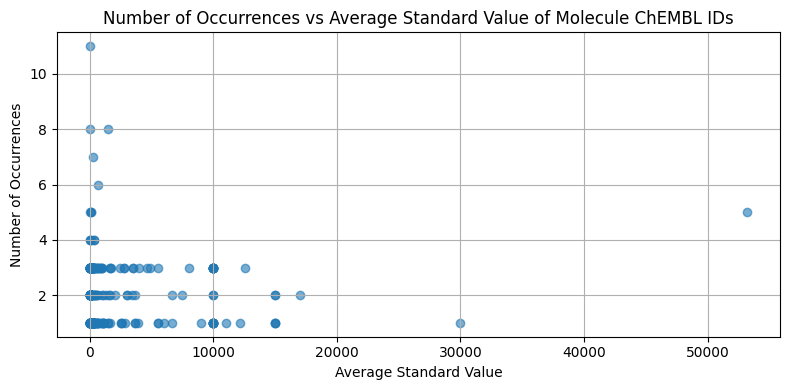

In [86]:
#Calculate the number of occurrences of each molecule_chembl_id
molecule_counts = df4['molecule_chembl_id'].value_counts()

# Calculate the average standard_value for each unique molecule_chembl_id
average_standard_values = df4.groupby('molecule_chembl_id')['standard_value'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'molecule_chembl_id': molecule_counts.index,
    'count': molecule_counts.values,
    'average_standard_value': average_standard_values.values
})

# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(plot_data['average_standard_value'], plot_data['count'], alpha=0.6)
plt.title('Number of Occurrences vs Average Standard Value of Molecule ChEMBL IDs')
plt.xlabel('Average Standard Value')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.tight_layout()

# Show the figure
plt.show()


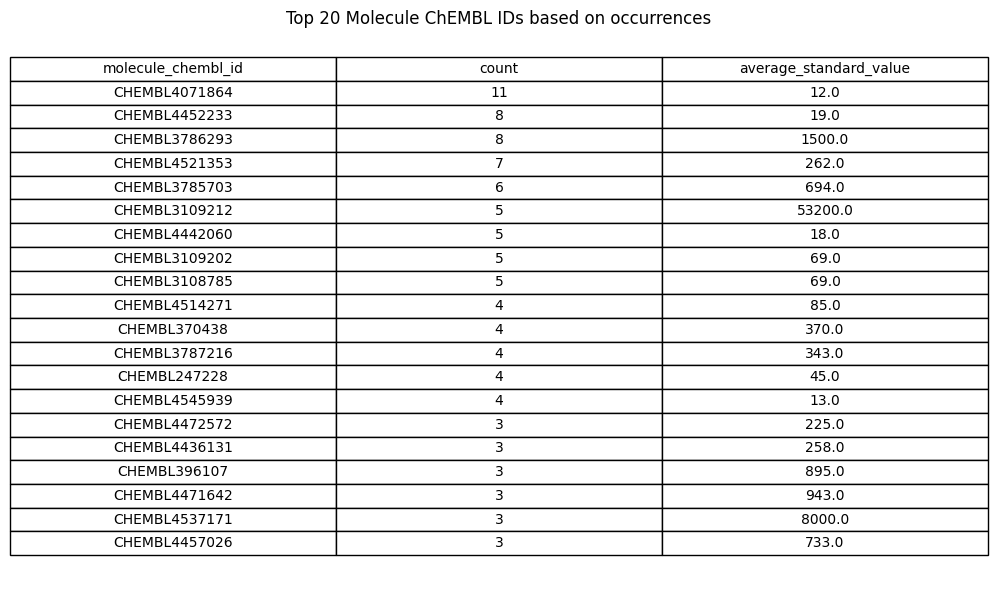

In [87]:
# Calculate the number of occurrences of each molecule_chembl_id
molecule_counts = df4['molecule_chembl_id'].value_counts()

# Calculate the average standard_value for each unique molecule_chembl_id
average_standard_values = df4.groupby('molecule_chembl_id')['standard_value'].mean()

# Round the average_standard_value to a whole number
average_standard_values = average_standard_values.round()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'molecule_chembl_id': molecule_counts.index,
    'count': molecule_counts.values,
    'average_standard_value': average_standard_values.values
})

# Select the top 20 most occurring molecule_chembl_id
top_20_plot_data = plot_data.nlargest(20, 'count')

# Create a graphical table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_20_plot_data.values,
                 colLabels=top_20_plot_data.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Top 20 Molecule ChEMBL IDs based on occurrences')
plt.tight_layout()

# Show the figure
plt.show()

In [15]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Filtering of Target Protein by EC50 Values
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

In [88]:
activity = new_client.activity
res1 = activity.filter(target_chembl_id=selected_target).filter(standard_type="EC50")

In [89]:
dfe1 = pd.DataFrame.from_dict(res1)

In [90]:
dfe1.head(10)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,3395880,[],CHEMBL1221002,Inhibition of endogenous RIP1 autophosphorylat...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,182.0
1,None,None,3395881,[],CHEMBL1221002,Inhibition of endogenous RIP1 autophosphorylat...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,18.0
2,None,None,17953082,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,74.0
3,None,None,17953083,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,49.0
4,None,None,17953084,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,262.0
5,None,None,17953085,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,56.0
6,None,None,17953086,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,198.0
7,None,None,17953087,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,64.0
8,None,None,17953088,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,28.0
9,None,None,17953089,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,10000.0


## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it

In [73]:
dfe2 = dfe1[dfe1.standard_value.notna()]
dfe2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,3395880,[],CHEMBL1221002,Inhibition of endogenous RIP1 autophosphorylat...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,182.0
1,None,None,3395881,[],CHEMBL1221002,Inhibition of endogenous RIP1 autophosphorylat...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,18.0
2,None,None,17953082,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,74.0
3,None,None,17953083,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,49.0
4,None,None,17953084,[],CHEMBL3993115,Inhibition of RIP1 in human HT-29 cells assess...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25609917,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5360422,Inhibition of recombinant GST tagged RIPK1 (1 ...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,16.7
120,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25609918,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5360422,Inhibition of recombinant GST tagged RIPK1 (1 ...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,17.1
121,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25609919,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5360422,Inhibition of recombinant GST tagged RIPK1 (1 ...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,15.75
122,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25609920,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5360422,Inhibition of recombinant GST tagged RIPK1 (1 ...,B,None,None,BAO_0000188,...,Homo sapiens,Receptor-interacting serine/threonine-protein ...,9606,None,None,EC50,nM,UO_0000065,None,16.1


In [16]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Labeling bioactivity based on EC50
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))


The bioactivity data is in the EC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [74]:
bioactivity_class_e = []
for i in dfe2.standard_value:
  if float(i) >= 10000:
    bioactivity_class_e.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class_e.append("active")
  else:
   bioactivity_class_e.append("intermediate")

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [75]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
dfe3 = dfe2[selection]
dfe3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL195008,CN1C(=O)C(Cc2c[nH]c3ccccc23)NC1=S,182.0
1,CHEMBL370438,CN1C(=O)N[C@H](Cc2c[nH]c3c(Cl)cccc23)C1=O,18.0
2,CHEMBL4061192,CCC(C)(C)C(=O)N(O)Cc1cc(F)cc(F)c1F,74.0
3,CHEMBL4083065,CCC(C)(C)C(=O)N(O)Cc1cc(F)c(F)c(F)c1,49.0
4,CHEMBL4099502,CCC(C)(C)C(=O)N(O)Cc1ccc(F)c(F)c1F,262.0
...,...,...,...
119,CHEMBL5411784,O=c1n(C23CC(F)(C2)C3)nc2n1[C@H](c1cc(F)c(Cl)c(...,16.7
120,CHEMBL5418714,O=c1n(C23CC(F)(C2)C3)nc2n1[C@H](c1ccc(Cl)c(F)c...,17.1
121,CHEMBL5428474,Cc1c(F)cc([C@@H]2CCc3nn(C45CC(F)(C4)C5)c(=O)n3...,15.75
122,CHEMBL5413896,Cc1c(F)cc([C@@H]2CCc3nn(C45CC(C#N)(C4)C5)c(=O)...,16.1


In [76]:
bioactivity_class_e = pd.Series(bioactivity_class_e, name='bioactivity').reset_index(drop=True)
dfe4 = pd.concat([dfe3.reset_index(drop=True), bioactivity_class_e], axis=1)
dfe4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity
0,CHEMBL195008,CN1C(=O)C(Cc2c[nH]c3ccccc23)NC1=S,182.0,active
1,CHEMBL370438,CN1C(=O)N[C@H](Cc2c[nH]c3c(Cl)cccc23)C1=O,18.0,active
2,CHEMBL4061192,CCC(C)(C)C(=O)N(O)Cc1cc(F)cc(F)c1F,74.0,active
3,CHEMBL4083065,CCC(C)(C)C(=O)N(O)Cc1cc(F)c(F)c(F)c1,49.0,active
4,CHEMBL4099502,CCC(C)(C)C(=O)N(O)Cc1ccc(F)c(F)c1F,262.0,active
...,...,...,...,...
77,CHEMBL5411784,O=c1n(C23CC(F)(C2)C3)nc2n1[C@H](c1cc(F)c(Cl)c(...,16.7,active
78,CHEMBL5418714,O=c1n(C23CC(F)(C2)C3)nc2n1[C@H](c1ccc(Cl)c(F)c...,17.1,active
79,CHEMBL5428474,Cc1c(F)cc([C@@H]2CCc3nn(C45CC(F)(C4)C5)c(=O)n3...,15.75,active
80,CHEMBL5413896,Cc1c(F)cc([C@@H]2CCc3nn(C45CC(C#N)(C4)C5)c(=O)...,16.1,active


In [18]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Exporting CSV file of EC50 dataset
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

In [77]:
dfe4.to_csv('EC50_bioactivity_data_preprocessed.csv', index=False)

In [ ]:
from google.colab import files
files.download('EC50_bioactivity_data_preprocessed.csv')

In [ ]:
# @title
# Define the HTML and CSS for the banner
banner_html = """
<div style="padding:20px;
            color:#150d0a;
            margin:0px;
            font-size:220%;
            text-align:center;
            display:block;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color: #90EE90;
            overflow:hidden;
            font-weight:500;
            border-radius: 0;">
    Exploratory Data Analysis
</div>
<center>
"""

# Display the banner
display(HTML(banner_html))

Total number of molecules: 82
Unique number of molecules: 81


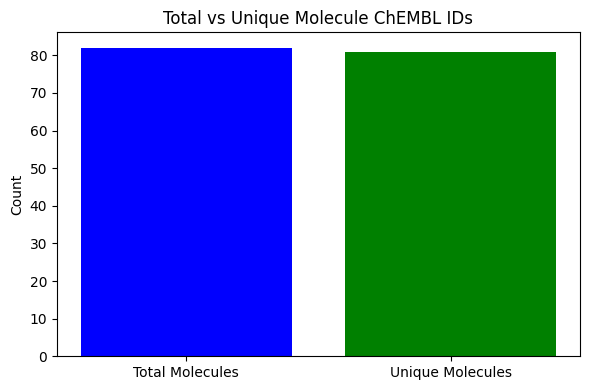

In [78]:
 # Calculate total and unique molecule_chembl_id counts
total_molecules = dfe4['molecule_chembl_id'].count()
unique_molecules = dfe4['molecule_chembl_id'].nunique()
print(f"Total number of molecules: {total_molecules}")
print(f"Unique number of molecules: {unique_molecules}")

# Create a bar plot for total vs unique molecule_chembl_id counts
plt.figure(figsize=(6, 4))
plt.bar(['Total Molecules', 'Unique Molecules'], [total_molecules, unique_molecules], color=['blue', 'green'])
plt.title('Total vs Unique Molecule ChEMBL IDs')
plt.ylabel('Count')
plt.tight_layout()

# Show the figure
plt.show()

bioactivity
active          37
intermediate    28
inactive        17
Name: count, dtype: int64


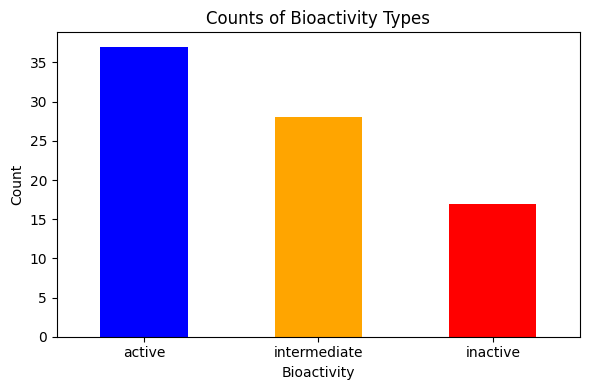

In [79]:
# Calculate the counts of each bioactivity type
bioactivity_counts = dfe4['bioactivity'].value_counts()
print(bioactivity_counts)

# Create a bar plot for bioactivity counts
plt.figure(figsize=(6, 4))
bioactivity_counts.plot(kind='bar', color=['blue', 'orange', 'red'])
plt.title('Counts of Bioactivity Types')
plt.xlabel('Bioactivity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()


# Show the figure
plt.show()

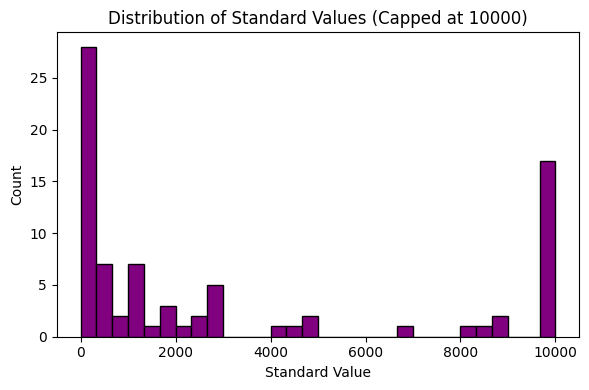

In [92]:
dfe4['standard_value'] = pd.to_numeric(dfe4['standard_value'], errors='coerce')

# Cap the standard_value at 10000 for the histogram
capped_standard_values = np.where(dfe4['standard_value'] > 10000, 10000, dfe4['standard_value'])

# Create a histogram for the capped standard_value column
plt.figure(figsize=(6, 4))
plt.hist(capped_standard_values, bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Standard Values (Capped at 10000)')
plt.xlabel('Standard Value')
plt.ylabel('Count')
plt.tight_layout()

# Show the figure
plt.show()

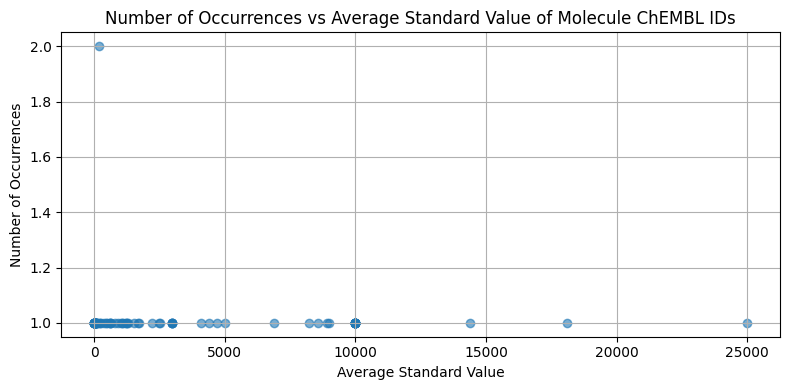

In [94]:
#Calculate the number of occurrences of each molecule_chembl_id
molecule_counts = dfe4['molecule_chembl_id'].value_counts()

# Calculate the average standard_value for each unique molecule_chembl_id
average_standard_values = dfe4.groupby('molecule_chembl_id')['standard_value'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'molecule_chembl_id': molecule_counts.index,
    'count': molecule_counts.values,
    'average_standard_value': average_standard_values.values
})

# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(plot_data['average_standard_value'], plot_data['count'], alpha=0.6)
plt.title('Number of Occurrences vs Average Standard Value of Molecule ChEMBL IDs')
plt.xlabel('Average Standard Value')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.tight_layout()

# Show the figure
plt.show()


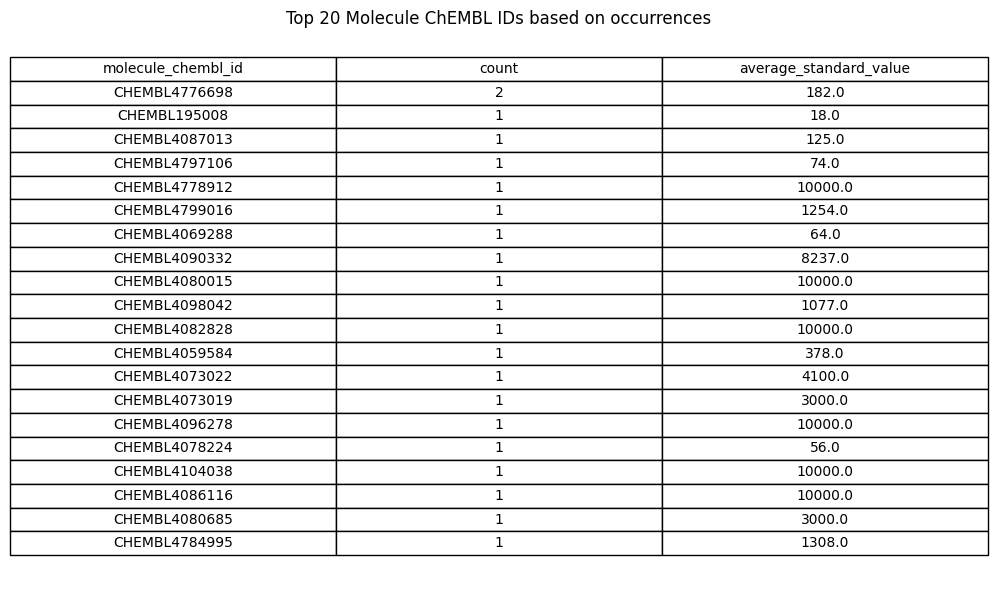

In [95]:
# Calculate the number of occurrences of each molecule_chembl_id
molecule_counts = dfe4['molecule_chembl_id'].value_counts()

# Calculate the average standard_value for each unique molecule_chembl_id
average_standard_values = dfe4.groupby('molecule_chembl_id')['standard_value'].mean()

# Round the average_standard_value to a whole number
average_standard_values = average_standard_values.round()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'molecule_chembl_id': molecule_counts.index,
    'count': molecule_counts.values,
    'average_standard_value': average_standard_values.values
})

# Select the top 20 most occurring molecule_chembl_id
top_20_plot_data = plot_data.nlargest(20, 'count')

# Create a graphical table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=top_20_plot_data.values,
                 colLabels=top_20_plot_data.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title('Top 20 Molecule ChEMBL IDs based on occurrences')
plt.tight_layout()

# Show the figure
plt.show()